<a href="https://colab.research.google.com/github/charlie-51135/Intro-to-ML/blob/main/Homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [104]:
%matplotlib inline
import numpy as np
import pandas as pd
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

torch.set_printoptions(edgeitems=2, linewidth=75)

def model_linear(X, w1, b):
    return w1 * X + b

def model_nonlinear(X, w2, w1, b):
    return w2 * X ** 2 + w1 * X + b

def loss_fn(y_pred, y):
    squared_diffs = (y_pred - y)**2
    return squared_diffs.mean()

def training_loop(model_type, n_epochs, optimizer, params, X_train, y_train):
    for epoch in range(1, n_epochs + 1):
        y_pred = model_type(X_train, *params)
        loss = loss_fn(y_pred, y_train)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f'Epoch {epoch}, \tLoss {loss:.6f}')

    return params

# **Problem 1: SGD**

In [105]:
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0,
                    8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9,
                    33.9, 21.8, 48.4, 60.4, 68.4])
t_un = 0.1 * t_u

for learning_rate in [0.1, 0.01, 0.001, 0.0001]:
    print(f'\nLearning rate = {learning_rate}\n')
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
    optimizer = optim.SGD([params], lr=learning_rate)

    training_loop(
        model_type = model_nonlinear,
        n_epochs = 5000,
        optimizer = optimizer,
        params = params,
        X_train = t_un,
        y_train = t_c)


Learning rate = 0.1

Epoch 500, 	Loss nan
Epoch 1000, 	Loss nan
Epoch 1500, 	Loss nan
Epoch 2000, 	Loss nan
Epoch 2500, 	Loss nan
Epoch 3000, 	Loss nan
Epoch 3500, 	Loss nan
Epoch 4000, 	Loss nan
Epoch 4500, 	Loss nan
Epoch 5000, 	Loss nan

Learning rate = 0.01

Epoch 500, 	Loss nan
Epoch 1000, 	Loss nan
Epoch 1500, 	Loss nan
Epoch 2000, 	Loss nan
Epoch 2500, 	Loss nan
Epoch 3000, 	Loss nan
Epoch 3500, 	Loss nan
Epoch 4000, 	Loss nan
Epoch 4500, 	Loss nan
Epoch 5000, 	Loss nan

Learning rate = 0.001

Epoch 500, 	Loss nan
Epoch 1000, 	Loss nan
Epoch 1500, 	Loss nan
Epoch 2000, 	Loss nan
Epoch 2500, 	Loss nan
Epoch 3000, 	Loss nan
Epoch 3500, 	Loss nan
Epoch 4000, 	Loss nan
Epoch 4500, 	Loss nan
Epoch 5000, 	Loss nan

Learning rate = 0.0001

Epoch 500, 	Loss 10.708596
Epoch 1000, 	Loss 8.642083
Epoch 1500, 	Loss 7.171005
Epoch 2000, 	Loss 6.123478
Epoch 2500, 	Loss 5.377227
Epoch 3000, 	Loss 4.845286
Epoch 3500, 	Loss 4.465788
Epoch 4000, 	Loss 4.194724
Epoch 4500, 	Loss 4.000802
Epoch 

# **Problem 1: ADAM**

In [106]:
for learning_rate in [0.1, 0.01, 0.001, 0.0001]:
    print(f'\nLearning rate = {learning_rate}\n')
    params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
    optimizer = optim.Adam([params], lr=learning_rate)

    training_loop(
        model_type = model_nonlinear,
        n_epochs = 5000,
        optimizer = optimizer,
        params = params,
        X_train = t_un,
        y_train = t_c)


Learning rate = 0.1

Epoch 500, 	Loss 2.782507
Epoch 1000, 	Loss 2.486027
Epoch 1500, 	Loss 2.261513
Epoch 2000, 	Loss 2.144077
Epoch 2500, 	Loss 2.101927
Epoch 3000, 	Loss 2.092149
Epoch 3500, 	Loss 2.090817
Epoch 4000, 	Loss 2.090725
Epoch 4500, 	Loss 2.090722
Epoch 5000, 	Loss 2.090721

Learning rate = 0.01

Epoch 500, 	Loss 6.111171
Epoch 1000, 	Loss 3.936777
Epoch 1500, 	Loss 3.117804
Epoch 2000, 	Loss 2.931840
Epoch 2500, 	Loss 2.871260
Epoch 3000, 	Loss 2.812938
Epoch 3500, 	Loss 2.744088
Epoch 4000, 	Loss 2.664673
Epoch 4500, 	Loss 2.576367
Epoch 5000, 	Loss 2.482456

Learning rate = 0.001

Epoch 500, 	Loss 103.795021
Epoch 1000, 	Loss 13.018479
Epoch 1500, 	Loss 8.064860
Epoch 2000, 	Loss 7.688990
Epoch 2500, 	Loss 7.295183
Epoch 3000, 	Loss 6.830939
Epoch 3500, 	Loss 6.306171
Epoch 4000, 	Loss 5.739597
Epoch 4500, 	Loss 5.159210
Epoch 5000, 	Loss 4.600074

Learning rate = 0.0001

Epoch 500, 	Loss 578.252686
Epoch 1000, 	Loss 491.236542
Epoch 1500, 	Loss 413.867676
Epoch 2000


SGD Model:
Epoch 500, 	Loss 10.708596
Epoch 1000, 	Loss 8.642083
Epoch 1500, 	Loss 7.171005
Epoch 2000, 	Loss 6.123478
Epoch 2500, 	Loss 5.377227
Epoch 3000, 	Loss 4.845286
Epoch 3500, 	Loss 4.465788
Epoch 4000, 	Loss 4.194724
Epoch 4500, 	Loss 4.000802
Epoch 5000, 	Loss 3.861744

ADAM Model:
Epoch 500, 	Loss 2.782507
Epoch 1000, 	Loss 2.486027
Epoch 1500, 	Loss 2.261513
Epoch 2000, 	Loss 2.144077
Epoch 2500, 	Loss 2.101927
Epoch 3000, 	Loss 2.092149
Epoch 3500, 	Loss 2.090817
Epoch 4000, 	Loss 2.090725
Epoch 4500, 	Loss 2.090722
Epoch 5000, 	Loss 2.090721

Linear Model:
Epoch 500, 	Loss 7.860120
Epoch 1000, 	Loss 3.828538
Epoch 1500, 	Loss 3.092191
Epoch 2000, 	Loss 2.957698
Epoch 2500, 	Loss 2.933134
Epoch 3000, 	Loss 2.928648
Epoch 3500, 	Loss 2.927830
Epoch 4000, 	Loss 2.927679
Epoch 4500, 	Loss 2.927652
Epoch 5000, 	Loss 2.927647


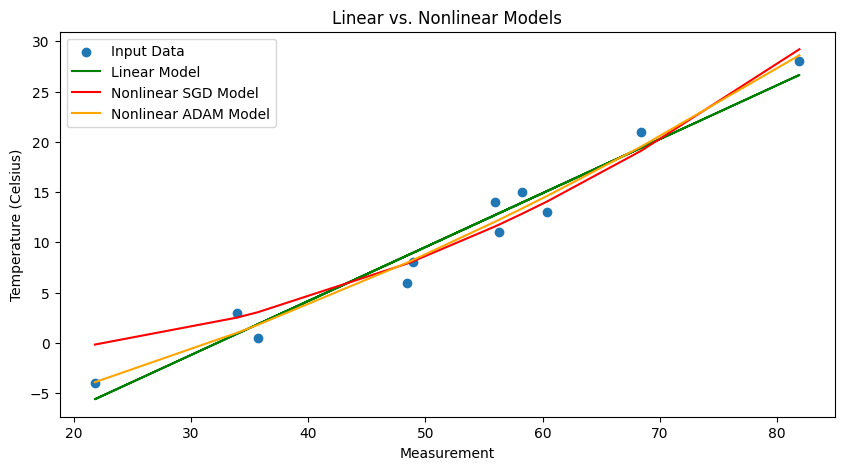

In [107]:
# Compare linear and nonlinear models
# Best SGD nonlinear
print("\nSGD Model:")
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr=0.0001)
trained_params_nonlinear_sgd = training_loop(
    model_type = model_nonlinear,
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    X_train = t_un,
    y_train = t_c)

# Best ADAM nonlinear
print("\nADAM Model:")
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True)
optimizer = optim.Adam([params], lr=0.1)
trained_params_nonlinear_adam = training_loop(
    model_type = model_nonlinear,
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    X_train = t_un,
    y_train = t_c)

# Best linear
print("\nLinear Model:")
params = torch.tensor([1.0, 0.0], requires_grad=True)
optimizer = optim.SGD([params], lr=0.01)
trained_params_linear = training_loop(
    model_type = model_linear,
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    X_train = t_un,
    y_train = t_c)


# Predicted values
t_p_linear = model_linear(t_un, *trained_params_linear)
t_p_nonlinear_sgd = model_nonlinear(t_un, *trained_params_nonlinear_sgd)
t_p_nonlinear_adam = model_nonlinear(t_un, *trained_params_nonlinear_adam)

# Sort data for graphing
sorted_indices = np.argsort(t_u.numpy())
t_p_nonlinear_sgd = t_p_nonlinear_sgd[sorted_indices]
t_p_nonlinear_adam = t_p_nonlinear_adam[sorted_indices]

# Plot data vs predictions
plt.figure(figsize=(10, 5))
plt.title('Linear vs. Nonlinear Models')
plt.xlabel('Measurement')
plt.ylabel('Temperature (Celsius)')
plt.scatter(t_u.numpy(), t_c.numpy(), label='Input Data')
plt.plot(t_u.numpy(), t_p_linear.detach().numpy(), label='Linear Model', color='green')
plt.plot(t_u.numpy()[sorted_indices], t_p_nonlinear_sgd.detach().numpy(), label='Nonlinear SGD Model', color='red')
plt.plot(t_u.numpy()[sorted_indices], t_p_nonlinear_adam.detach().numpy(), label='Nonlinear ADAM Model', color='orange')
plt.legend()
plt.show()

# **Problem 2: Housing, 5 features**

In [108]:
def model_linear(X, w):
    return torch.matmul(X, w)

def loss_fn_rmse(y_pred, y):
    squared_diffs = (y_pred - y)**2
    mean_squared_diffs = squared_diffs.mean()
    return mean_squared_diffs.sqrt()

def training_loop_val(n_epochs, optimizer, params, X_train, y_train, X_val, y_val):
    train_losses = []
    val_losses = []
    for epoch in range(1, n_epochs + 1):
        train_y_pred = model_linear(X_train, params)
        train_loss = loss_fn_rmse(train_y_pred, y_train)
        train_losses.append(train_loss.item())

        val_y_pred = model_linear(X_val, params)
        val_loss = loss_fn_rmse(val_y_pred, y_val)
        val_losses.append(val_loss.item())

        optimizer.zero_grad()
        train_loss.backward()
        optimizer.step()

        if epoch % 500 == 0:
            print(f'Epoch {epoch}, \tTrain Loss {train_loss:.1f}, \tVal Loss {val_loss:.1f}')

    return params, train_losses, val_losses

file_path = '/content/drive/MyDrive/Intro-to-ML/Housing.csv'
housing = pd.read_csv(file_path)
# Check for null values
#housing.isnull().sum()*100/housing.shape[0]

# Replace yes/no data
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
housing[varlist] = housing[varlist].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# Split training and test data
input_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
y = housing.pop('price')
X = housing[input_vars]

# Add bias column
X = np.c_[X, np.ones((len(X), 1))]

# Convert to tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Split training and test data
torch.manual_seed(0)
n_samples = X_tensor.shape[0]
n_val = int(n_samples * 0.2)
shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

X_train = X_tensor[train_indices]
y_train = y_tensor[train_indices]

X_val = X_tensor[val_indices]
y_val = y_tensor[val_indices]

# **Problem 2: 5 features, SGD**


Learning rate = 0.1

Epoch 500, 	Train Loss 2595424.2, 	Val Loss 2758267.2
Epoch 1000, 	Train Loss 2595376.8, 	Val Loss 2758226.2
Epoch 1500, 	Train Loss 2595329.2, 	Val Loss 2758185.0
Epoch 2000, 	Train Loss 2595281.8, 	Val Loss 2758143.8
Epoch 2500, 	Train Loss 2595234.2, 	Val Loss 2758103.0
Epoch 3000, 	Train Loss 2595186.8, 	Val Loss 2758061.5
Epoch 3500, 	Train Loss 2595139.2, 	Val Loss 2758020.5
Epoch 4000, 	Train Loss 2595091.8, 	Val Loss 2757979.5
Epoch 4500, 	Train Loss 2595044.5, 	Val Loss 2757938.2
Epoch 5000, 	Train Loss 2594997.0, 	Val Loss 2757897.2

Params = tensor([776.7558, 382.2392, 152.3281, 223.9528,  -6.5180, 140.4912],
       requires_grad=True)



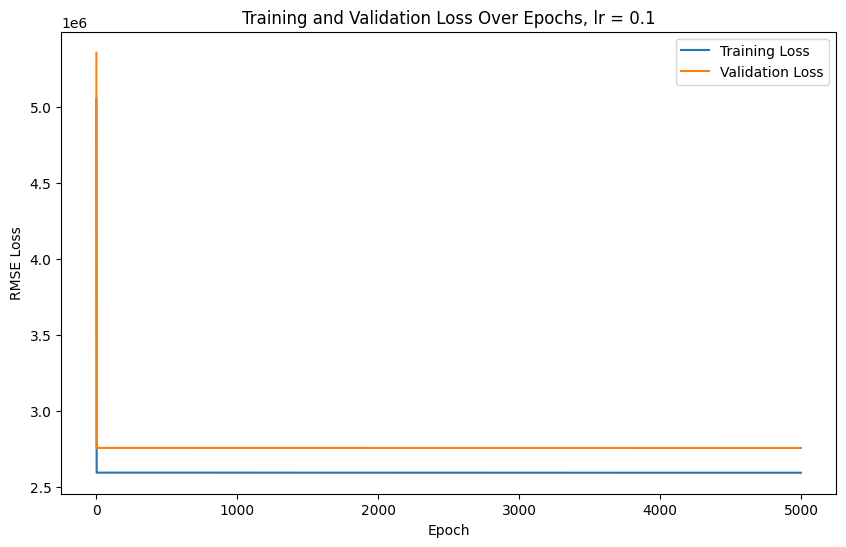


Learning rate = 0.01

Epoch 500, 	Train Loss 2595466.8, 	Val Loss 2758304.0
Epoch 1000, 	Train Loss 2595462.0, 	Val Loss 2758300.0
Epoch 1500, 	Train Loss 2595457.2, 	Val Loss 2758296.0
Epoch 2000, 	Train Loss 2595452.5, 	Val Loss 2758291.8
Epoch 2500, 	Train Loss 2595447.8, 	Val Loss 2758287.8
Epoch 3000, 	Train Loss 2595443.0, 	Val Loss 2758283.8
Epoch 3500, 	Train Loss 2595438.2, 	Val Loss 2758279.5
Epoch 4000, 	Train Loss 2595433.5, 	Val Loss 2758275.2
Epoch 4500, 	Train Loss 2595428.8, 	Val Loss 2758271.0
Epoch 5000, 	Train Loss 2595424.0, 	Val Loss 2758267.2

Params = tensor([7.7704e+02, 3.9446e+01, 1.6276e+01, 2.3490e+01, 3.4052e-01,
        1.4153e+01], requires_grad=True)



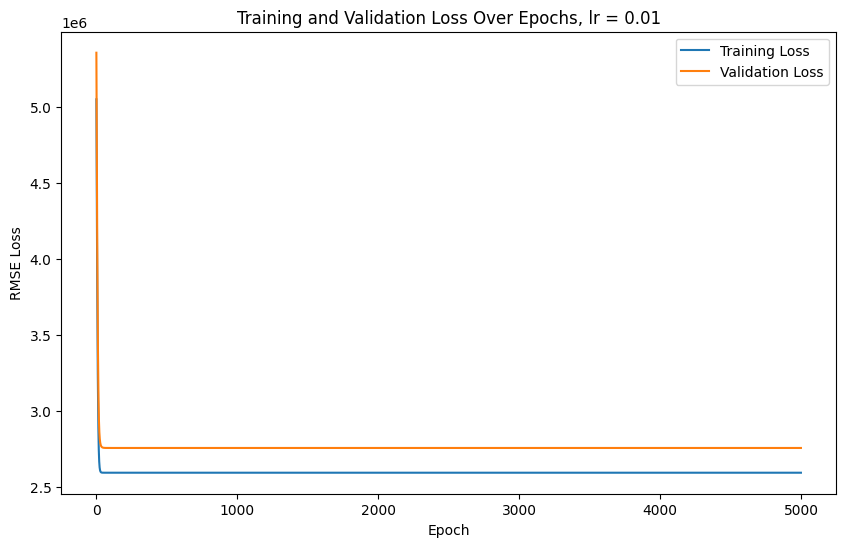


Learning rate = 0.001

Epoch 500, 	Train Loss 2595535.2, 	Val Loss 2760071.2
Epoch 1000, 	Train Loss 2595470.8, 	Val Loss 2758311.5
Epoch 1500, 	Train Loss 2595470.2, 	Val Loss 2758308.2
Epoch 2000, 	Train Loss 2595469.5, 	Val Loss 2758307.8
Epoch 2500, 	Train Loss 2595469.0, 	Val Loss 2758307.0
Epoch 3000, 	Train Loss 2595468.5, 	Val Loss 2758306.5
Epoch 3500, 	Train Loss 2595468.2, 	Val Loss 2758306.0
Epoch 4000, 	Train Loss 2595467.8, 	Val Loss 2758305.5
Epoch 4500, 	Train Loss 2595467.0, 	Val Loss 2758304.8
Epoch 5000, 	Train Loss 2595466.8, 	Val Loss 2758304.2

Params = tensor([777.0646,   5.1612,   2.6678,   3.4405,   1.0262,   1.5185],
       requires_grad=True)



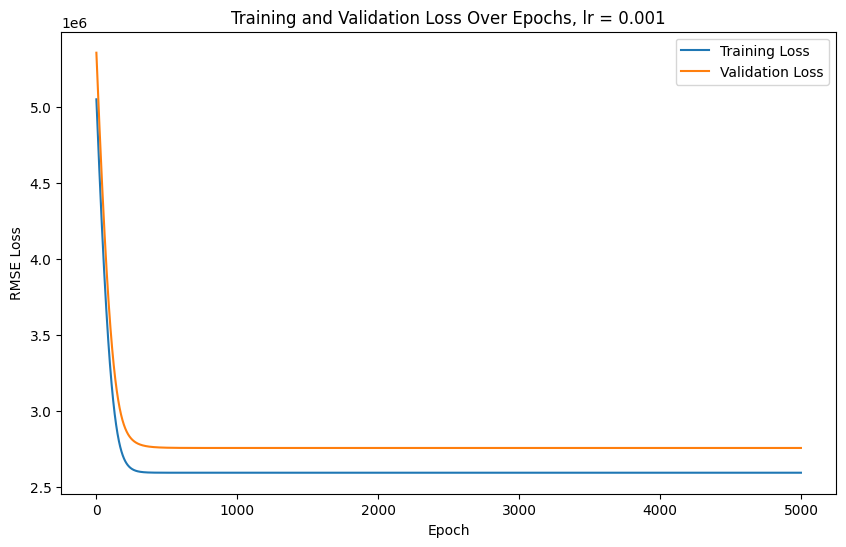


Learning rate = 0.0001

Epoch 500, 	Train Loss 4016830.8, 	Val Loss 4315995.0
Epoch 1000, 	Train Loss 3269379.0, 	Val Loss 3549824.2
Epoch 1500, 	Train Loss 2854501.5, 	Val Loss 3104380.2
Epoch 2000, 	Train Loss 2681557.2, 	Val Loss 2900162.5
Epoch 2500, 	Train Loss 2622235.2, 	Val Loss 2817893.0
Epoch 3000, 	Train Loss 2603597.8, 	Val Loss 2785011.0
Epoch 3500, 	Train Loss 2597920.2, 	Val Loss 2771094.5
Epoch 4000, 	Train Loss 2596207.2, 	Val Loss 2764753.0
Epoch 4500, 	Train Loss 2595692.2, 	Val Loss 2761670.0
Epoch 5000, 	Train Loss 2595537.5, 	Val Loss 2760099.2

Params = tensor([7.7375e+02, 1.7307e+00, 1.3064e+00, 1.4344e+00, 1.0944e+00,
        2.5455e-01], requires_grad=True)



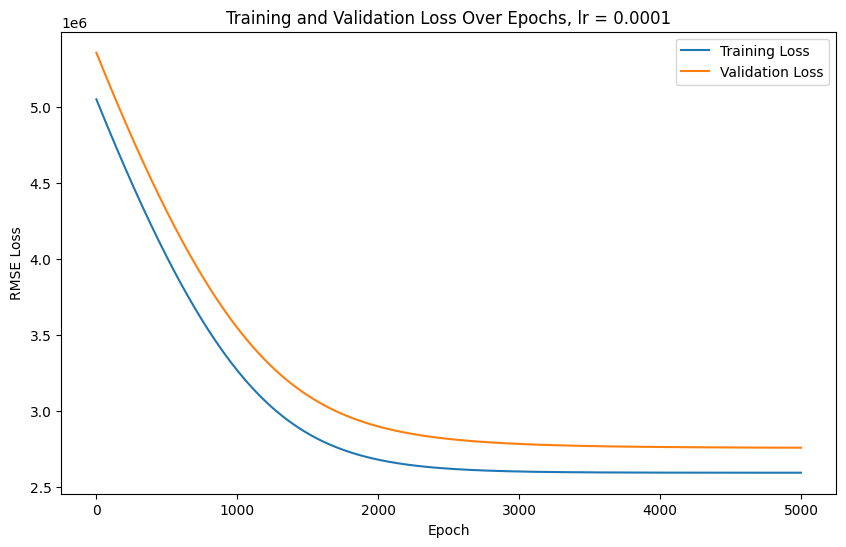

In [109]:
for learning_rate in [0.1, 0.01, 0.001, 0.0001]:
    print(f'\nLearning rate = {learning_rate}\n')
    params = torch.tensor([1.0] * len(input_vars) + [0.0], requires_grad=True)
    optimizer = optim.SGD([params], lr=learning_rate)

    trained_model, train_losses, val_losses = training_loop_val(
        n_epochs = 5000,
        optimizer = optimizer,
        params = params,
        X_train = X_train,
        y_train = y_train,
        X_val = X_val,
        y_val = y_val)
    print(f'\nParams = {trained_model}\n')

    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('RMSE Loss')
    plt.title(f'Training and Validation Loss Over Epochs, lr = {learning_rate}')
    plt.legend()
    plt.show()

# **Problem 2: 5 features, ADAM**


Learning rate = 1

Epoch 500, 	Train Loss 3136695.0, 	Val Loss 3410464.5
Epoch 1000, 	Train Loss 2614393.2, 	Val Loss 2806257.8
Epoch 1500, 	Train Loss 2593647.2, 	Val Loss 2758855.8
Epoch 2000, 	Train Loss 2593048.2, 	Val Loss 2756171.5
Epoch 2500, 	Train Loss 2592459.2, 	Val Loss 2755611.8
Epoch 3000, 	Train Loss 2591785.8, 	Val Loss 2755032.5
Epoch 3500, 	Train Loss 2591043.2, 	Val Loss 2754395.8
Epoch 4000, 	Train Loss 2590250.2, 	Val Loss 2753714.5
Epoch 4500, 	Train Loss 2589421.8, 	Val Loss 2753003.5
Epoch 5000, 	Train Loss 2588569.2, 	Val Loss 2752271.5

Params = tensor([ 772.5126, 3874.7002, 3779.2856, 3845.1042,  126.7897, 3972.9739],
       requires_grad=True)



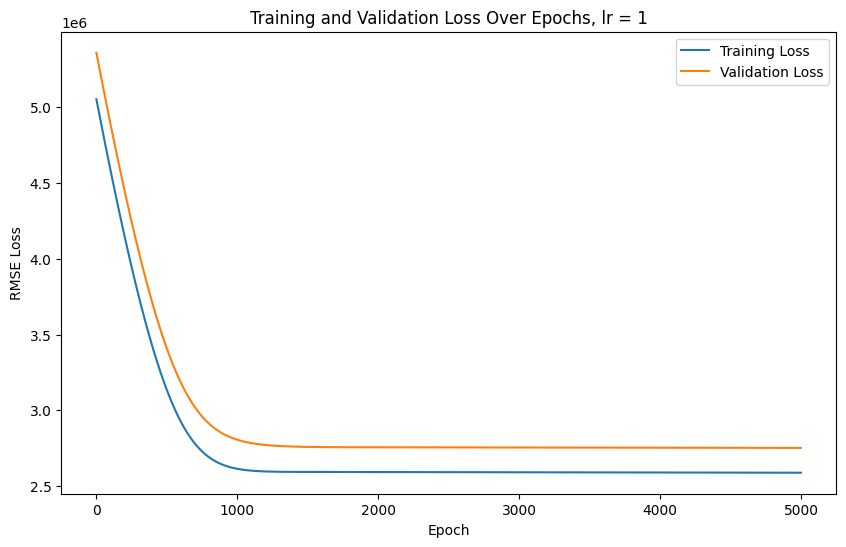


Learning rate = 0.1

Epoch 500, 	Train Loss 4815946.0, 	Val Loss 5121543.5
Epoch 1000, 	Train Loss 4585745.5, 	Val Loss 4890130.0
Epoch 1500, 	Train Loss 4362942.5, 	Val Loss 4665747.0
Epoch 2000, 	Train Loss 4148358.2, 	Val Loss 4449120.5
Epoch 2500, 	Train Loss 3942963.8, 	Val Loss 4241108.0
Epoch 3000, 	Train Loss 3747891.8, 	Val Loss 4042710.0
Epoch 3500, 	Train Loss 3564431.8, 	Val Loss 3855068.2
Epoch 4000, 	Train Loss 3394006.2, 	Val Loss 3679448.2
Epoch 4500, 	Train Loss 3238113.2, 	Val Loss 3517195.8
Epoch 5000, 	Train Loss 3098230.0, 	Val Loss 3369662.2

Params = tensor([473.3732, 485.6452, 484.6844, 485.3466, 472.1512, 485.7491],
       requires_grad=True)



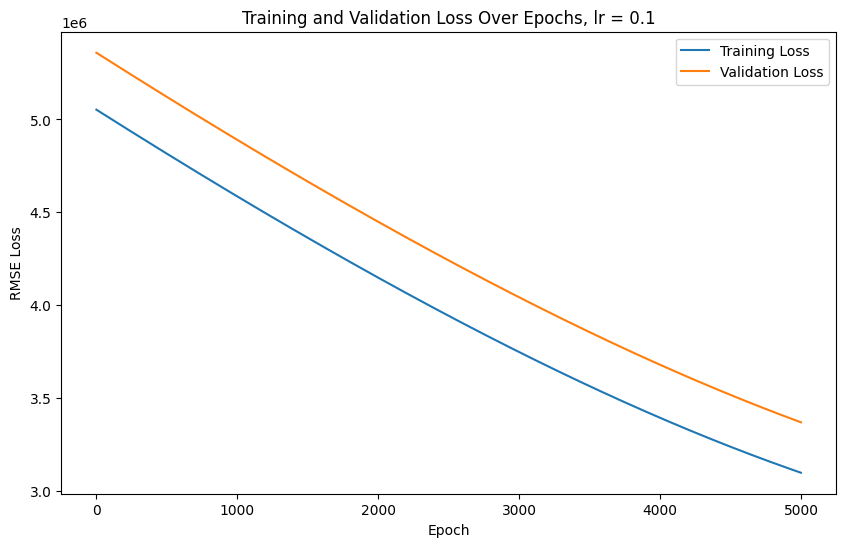


Learning rate = 0.01

Epoch 500, 	Train Loss 5028450.5, 	Val Loss 5334888.5
Epoch 1000, 	Train Loss 5004541.5, 	Val Loss 5310896.0
Epoch 1500, 	Train Loss 4980689.5, 	Val Loss 5286957.5
Epoch 2000, 	Train Loss 4956891.5, 	Val Loss 5263071.5
Epoch 2500, 	Train Loss 4933145.5, 	Val Loss 5239234.5
Epoch 3000, 	Train Loss 4909451.0, 	Val Loss 5215447.0
Epoch 3500, 	Train Loss 4885807.0, 	Val Loss 5191706.5
Epoch 4000, 	Train Loss 4862211.0, 	Val Loss 5168011.5
Epoch 4500, 	Train Loss 4838667.0, 	Val Loss 5144366.0
Epoch 5000, 	Train Loss 4815169.0, 	Val Loss 5120763.5

Params = tensor([50.8770, 50.9409, 50.9359, 50.9397, 50.8711, 49.9474],
       requires_grad=True)



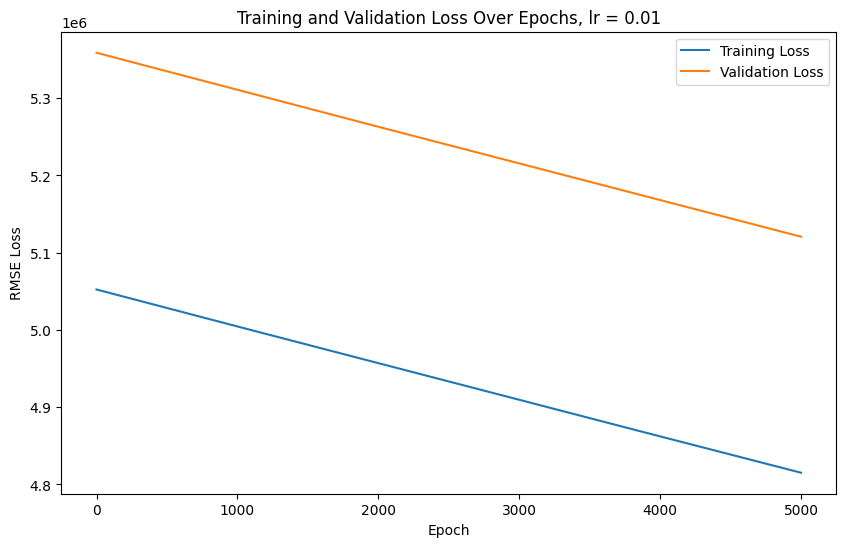


Learning rate = 0.001

Epoch 500, 	Train Loss 5049975.5, 	Val Loss 5356486.0
Epoch 1000, 	Train Loss 5047577.0, 	Val Loss 5354079.0
Epoch 1500, 	Train Loss 5045178.0, 	Val Loss 5351673.0
Epoch 2000, 	Train Loss 5042780.5, 	Val Loss 5349267.0
Epoch 2500, 	Train Loss 5040383.5, 	Val Loss 5346862.0
Epoch 3000, 	Train Loss 5037987.0, 	Val Loss 5344457.0
Epoch 3500, 	Train Loss 5035590.0, 	Val Loss 5342052.0
Epoch 4000, 	Train Loss 5033194.5, 	Val Loss 5339648.5
Epoch 4500, 	Train Loss 5030799.5, 	Val Loss 5337245.0
Epoch 5000, 	Train Loss 5028405.0, 	Val Loss 5334842.5

Params = tensor([5.9986, 5.9997, 5.9997, 5.9997, 5.9984, 4.9997],
       requires_grad=True)



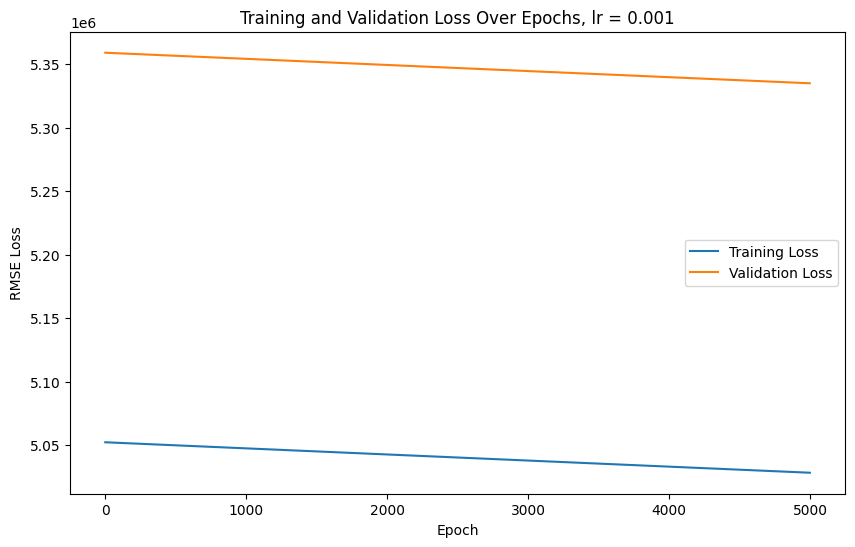


Learning rate = 0.0001

Epoch 500, 	Train Loss 5052131.0, 	Val Loss 5358648.5
Epoch 1000, 	Train Loss 5051890.5, 	Val Loss 5358407.5
Epoch 1500, 	Train Loss 5051650.5, 	Val Loss 5358167.0
Epoch 2000, 	Train Loss 5051410.5, 	Val Loss 5357926.0
Epoch 2500, 	Train Loss 5051170.5, 	Val Loss 5357685.5
Epoch 3000, 	Train Loss 5050930.5, 	Val Loss 5357445.0
Epoch 3500, 	Train Loss 5050690.0, 	Val Loss 5357204.0
Epoch 4000, 	Train Loss 5050450.5, 	Val Loss 5356963.0
Epoch 4500, 	Train Loss 5050211.0, 	Val Loss 5356722.0
Epoch 5000, 	Train Loss 5049970.5, 	Val Loss 5356481.5

Params = tensor([1.5001, 1.5001, 1.5001, 1.5001, 1.5001, 0.5000],
       requires_grad=True)



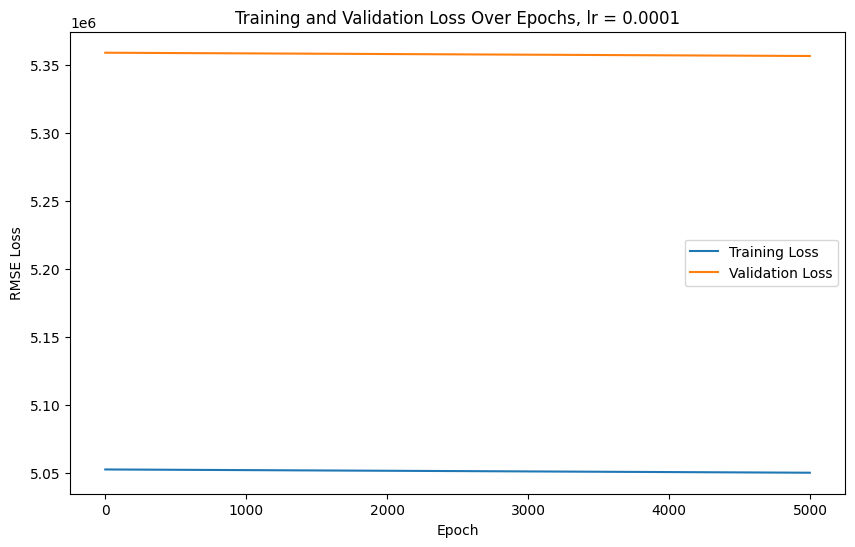

In [110]:
for learning_rate in [1, 0.1, 0.01, 0.001, 0.0001]:
    print(f'\nLearning rate = {learning_rate}\n')
    params = torch.tensor([1.0] * len(input_vars) + [0.0], requires_grad=True)
    optimizer = optim.Adam([params], lr=learning_rate)

    trained_model, train_losses, val_losses = training_loop_val(
        n_epochs = 5000,
        optimizer = optimizer,
        params = params,
        X_train = X_train,
        y_train = y_train,
        X_val = X_val,
        y_val = y_val)
    print(f'\nParams = {trained_model}\n')

    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('RMSE Loss')
    plt.title(f'Training and Validation Loss Over Epochs, lr = {learning_rate}')
    plt.legend()
    plt.show()

# **Problem 3: Housing, 11 features**

In [111]:
file_path = '/content/drive/MyDrive/Intro-to-ML/Housing.csv'
housing = pd.read_csv(file_path)
# Check for null values
#housing.isnull().sum()*100/housing.shape[0]

# Replace yes/no data
varlist =  ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
housing[varlist] = housing[varlist].apply(lambda x: x.map({'yes': 1, 'no': 0}))

# Split training and test data
input_vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea']
y = housing.pop('price')
X = housing[input_vars]

# Add bias column
X = np.c_[X, np.ones((len(X), 1))]

# Convert to tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y.values, dtype=torch.float32).view(-1, 1)

# Split training and test data
torch.manual_seed(0)
n_samples = X_tensor.shape[0]
n_val = int(n_samples * 0.2)
shuffled_indices = torch.randperm(n_samples)

train_indices = shuffled_indices[:-n_val]
val_indices = shuffled_indices[-n_val:]

X_train = X_tensor[train_indices]
y_train = y_tensor[train_indices]

X_val = X_tensor[val_indices]
y_val = y_tensor[val_indices]

# **Problem 3: 11 features, SGD**


Learning rate = 0.1

Epoch 500, 	Train Loss 2595421.8, 	Val Loss 2758265.5
Epoch 1000, 	Train Loss 2595372.5, 	Val Loss 2758223.0
Epoch 1500, 	Train Loss 2595322.8, 	Val Loss 2758180.2
Epoch 2000, 	Train Loss 2595273.5, 	Val Loss 2758137.8
Epoch 2500, 	Train Loss 2595224.0, 	Val Loss 2758095.0
Epoch 3000, 	Train Loss 2595174.5, 	Val Loss 2758052.5
Epoch 3500, 	Train Loss 2595125.0, 	Val Loss 2758010.0
Epoch 4000, 	Train Loss 2595075.5, 	Val Loss 2757967.2
Epoch 4500, 	Train Loss 2595026.0, 	Val Loss 2757924.8
Epoch 5000, 	Train Loss 2594976.8, 	Val Loss 2757882.0

Params = tensor([776.7392, 382.2381, 152.3279, 223.9514,  84.8942,  14.5232,
         51.2835,   8.2242,  14.5943,  -6.5183,  -3.3277, 140.4912],
       requires_grad=True)



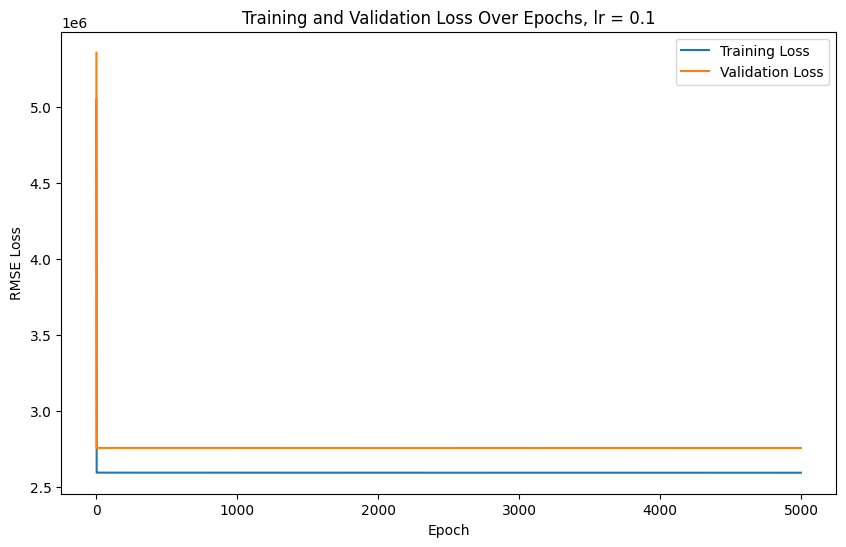


Learning rate = 0.01

Epoch 500, 	Train Loss 2595466.2, 	Val Loss 2758303.5
Epoch 1000, 	Train Loss 2595461.2, 	Val Loss 2758299.5
Epoch 1500, 	Train Loss 2595456.2, 	Val Loss 2758295.2
Epoch 2000, 	Train Loss 2595451.2, 	Val Loss 2758291.0
Epoch 2500, 	Train Loss 2595446.8, 	Val Loss 2758286.8
Epoch 3000, 	Train Loss 2595441.2, 	Val Loss 2758282.2
Epoch 3500, 	Train Loss 2595436.5, 	Val Loss 2758278.2
Epoch 4000, 	Train Loss 2595431.5, 	Val Loss 2758274.0
Epoch 4500, 	Train Loss 2595426.8, 	Val Loss 2758270.0
Epoch 5000, 	Train Loss 2595421.8, 	Val Loss 2758265.5

Params = tensor([7.7703e+02, 3.9446e+01, 1.6276e+01, 2.3490e+01, 9.4859e+00,
        2.3734e+00, 6.0651e+00, 1.7257e+00, 2.3987e+00, 3.4052e-01,
        5.9769e-01, 1.4153e+01], requires_grad=True)



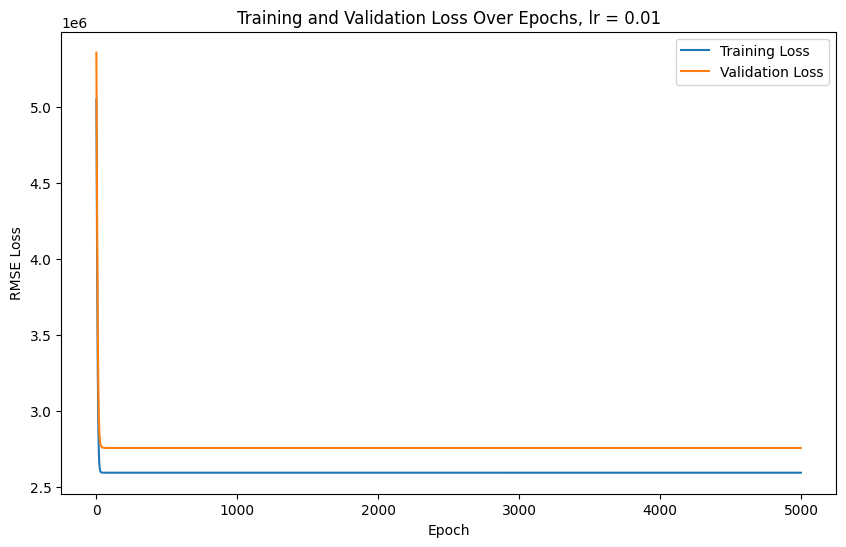


Learning rate = 0.001

Epoch 500, 	Train Loss 2595535.0, 	Val Loss 2760071.0
Epoch 1000, 	Train Loss 2595470.2, 	Val Loss 2758311.2
Epoch 1500, 	Train Loss 2595469.5, 	Val Loss 2758308.0
Epoch 2000, 	Train Loss 2595469.2, 	Val Loss 2758307.5
Epoch 2500, 	Train Loss 2595468.8, 	Val Loss 2758306.8
Epoch 3000, 	Train Loss 2595468.2, 	Val Loss 2758306.2
Epoch 3500, 	Train Loss 2595467.8, 	Val Loss 2758305.5
Epoch 4000, 	Train Loss 2595467.2, 	Val Loss 2758305.0
Epoch 4500, 	Train Loss 2595466.8, 	Val Loss 2758304.5
Epoch 5000, 	Train Loss 2595466.2, 	Val Loss 2758303.8

Params = tensor([777.0642,   5.1612,   2.6678,   3.4405,   1.9442,   1.1584,
          1.5425,   1.0755,   1.1786,   1.0262,   0.9902,   1.5185],
       requires_grad=True)



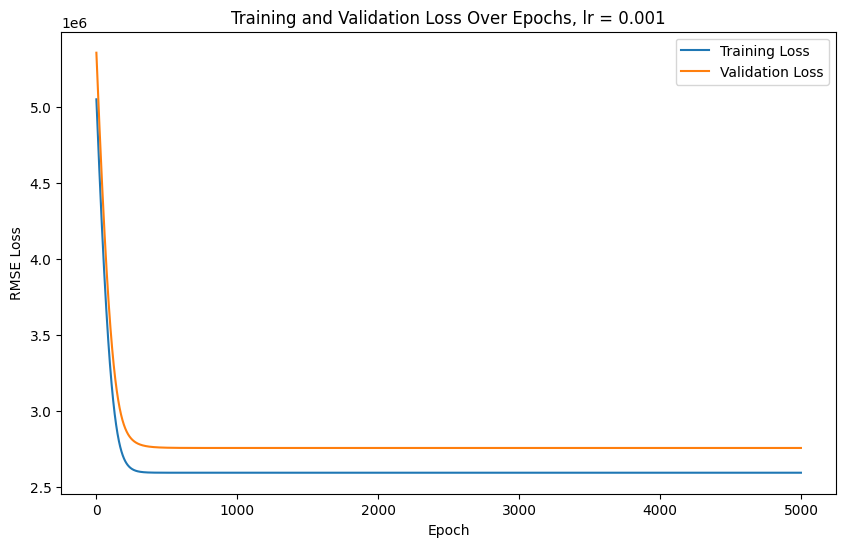


Learning rate = 0.0001

Epoch 500, 	Train Loss 4016829.2, 	Val Loss 4315993.0
Epoch 1000, 	Train Loss 3269377.8, 	Val Loss 3549822.8
Epoch 1500, 	Train Loss 2854501.0, 	Val Loss 3104379.2
Epoch 2000, 	Train Loss 2681556.8, 	Val Loss 2900162.0
Epoch 2500, 	Train Loss 2622234.8, 	Val Loss 2817892.5
Epoch 3000, 	Train Loss 2603597.2, 	Val Loss 2785010.5
Epoch 3500, 	Train Loss 2597919.8, 	Val Loss 2771094.2
Epoch 4000, 	Train Loss 2596207.0, 	Val Loss 2764752.8
Epoch 4500, 	Train Loss 2595691.8, 	Val Loss 2761669.5
Epoch 5000, 	Train Loss 2595537.0, 	Val Loss 2760099.0

Params = tensor([7.7375e+02, 1.7307e+00, 1.3064e+00, 1.4344e+00, 1.1895e+00,
        1.0366e+00, 1.0901e+00, 1.0105e+00, 1.0566e+00, 1.0944e+00,
        1.0292e+00, 2.5455e-01], requires_grad=True)



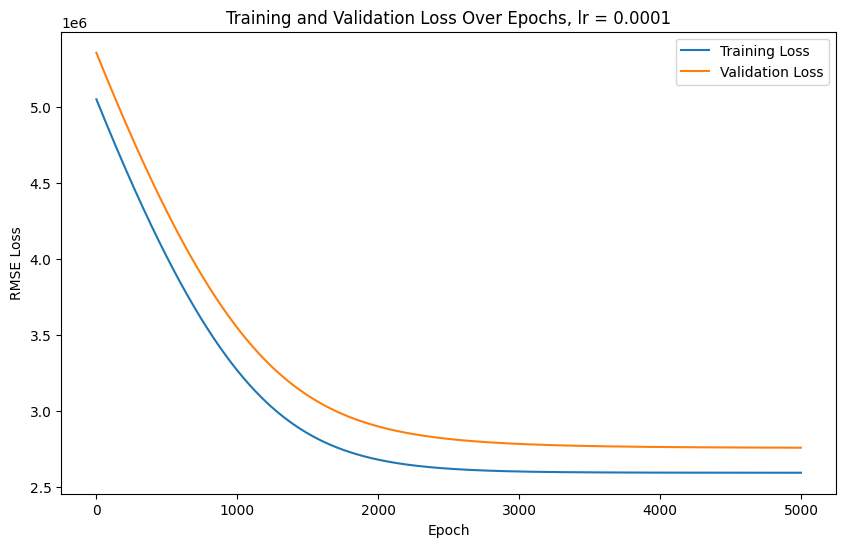

In [112]:
for learning_rate in [0.1, 0.01, 0.001, 0.0001]:
    print(f'\nLearning rate = {learning_rate}\n')
    params = torch.tensor([1.0] * len(input_vars) + [0.0], requires_grad=True)
    optimizer = optim.SGD([params], lr=learning_rate)

    trained_model, train_losses, val_losses = training_loop_val(
        n_epochs = 5000,
        optimizer = optimizer,
        params = params,
        X_train = X_train,
        y_train = y_train,
        X_val = X_val,
        y_val = y_val)
    print(f'\nParams = {trained_model}\n')

    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('RMSE Loss')
    plt.title(f'Training and Validation Loss Over Epochs, lr = {learning_rate}')
    plt.legend()
    plt.show()

# **Problem 3: 11 features, ADAM**


Learning rate = 1

Epoch 500, 	Train Loss 3136126.5, 	Val Loss 3409840.8
Epoch 1000, 	Train Loss 2614054.5, 	Val Loss 2805948.8
Epoch 1500, 	Train Loss 2593300.5, 	Val Loss 2758636.2
Epoch 2000, 	Train Loss 2592620.0, 	Val Loss 2755923.0
Epoch 2500, 	Train Loss 2591931.5, 	Val Loss 2755316.5
Epoch 3000, 	Train Loss 2591142.0, 	Val Loss 2754684.8
Epoch 3500, 	Train Loss 2590270.2, 	Val Loss 2753988.8
Epoch 4000, 	Train Loss 2589336.2, 	Val Loss 2753244.8
Epoch 4500, 	Train Loss 2588357.8, 	Val Loss 2752469.5
Epoch 5000, 	Train Loss 2587349.2, 	Val Loss 2751672.8

Params = tensor([ 771.5024, 3874.1772, 3778.6157, 3844.5759, 3592.4446, 3278.0881,
        3990.3027, 4352.7778, 2598.6616,  121.7759, -328.0467, 3972.5933],
       requires_grad=True)



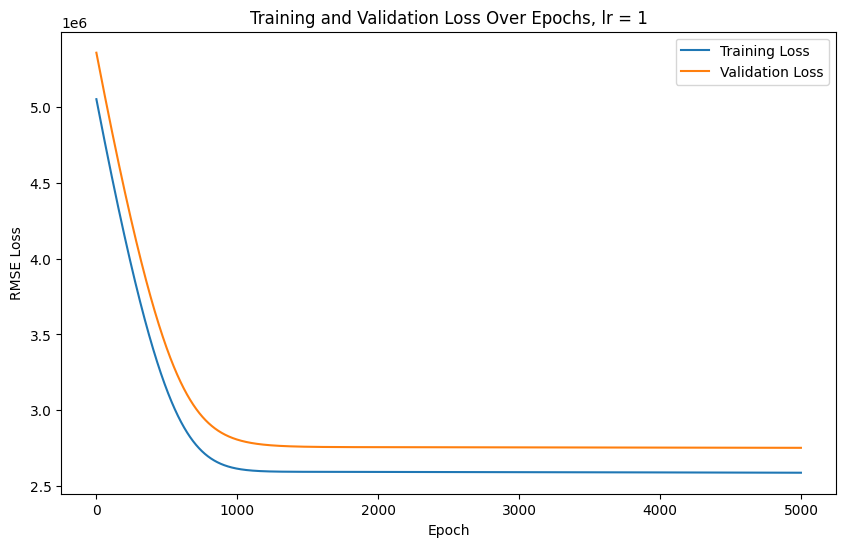


Learning rate = 0.1

Epoch 500, 	Train Loss 4815856.0, 	Val Loss 5121443.0
Epoch 1000, 	Train Loss 4585570.5, 	Val Loss 4889935.5
Epoch 1500, 	Train Loss 4362686.5, 	Val Loss 4665463.5
Epoch 2000, 	Train Loss 4148027.5, 	Val Loss 4448754.0
Epoch 2500, 	Train Loss 3942565.2, 	Val Loss 4240667.5
Epoch 3000, 	Train Loss 3747433.0, 	Val Loss 4042204.0
Epoch 3500, 	Train Loss 3563922.5, 	Val Loss 3854507.8
Epoch 4000, 	Train Loss 3393459.0, 	Val Loss 3678846.8
Epoch 4500, 	Train Loss 3237540.8, 	Val Loss 3516567.0
Epoch 5000, 	Train Loss 3097646.2, 	Val Loss 3369022.8

Params = tensor([473.3566, 485.6339, 484.6719, 485.3348, 483.0360, 480.9158,
        486.9691, 492.5383, 477.7708, 472.1307, 471.1954, 485.7388],
       requires_grad=True)



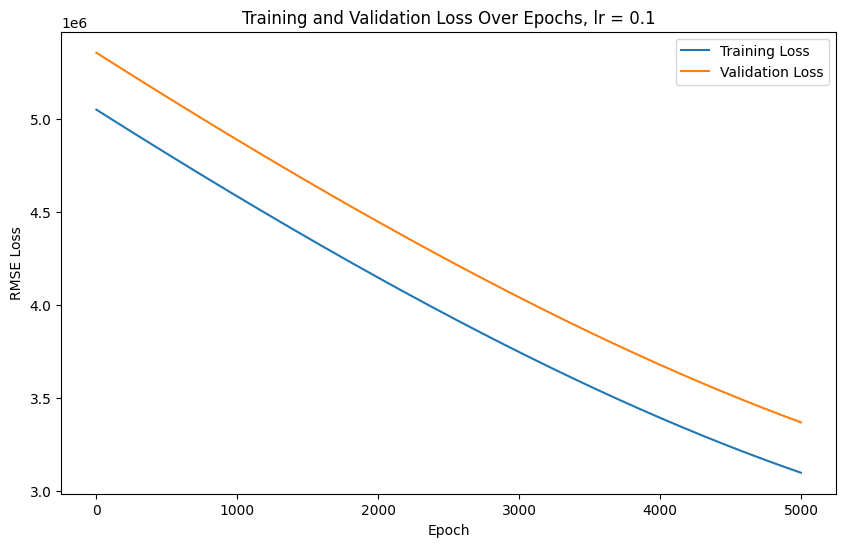


Learning rate = 0.01

Epoch 500, 	Train Loss 5028439.5, 	Val Loss 5334876.5
Epoch 1000, 	Train Loss 5004521.5, 	Val Loss 5310874.0
Epoch 1500, 	Train Loss 4980660.5, 	Val Loss 5286925.5
Epoch 2000, 	Train Loss 4956853.5, 	Val Loss 5263029.5
Epoch 2500, 	Train Loss 4933099.0, 	Val Loss 5239183.0
Epoch 3000, 	Train Loss 4909395.5, 	Val Loss 5215385.0
Epoch 3500, 	Train Loss 4885743.0, 	Val Loss 5191634.5
Epoch 4000, 	Train Loss 4862137.5, 	Val Loss 5167930.0
Epoch 4500, 	Train Loss 4838585.0, 	Val Loss 5144274.5
Epoch 5000, 	Train Loss 4815079.0, 	Val Loss 5120662.0

Params = tensor([50.8770, 50.9408, 50.9359, 50.9397, 50.9270, 50.9155, 50.9490,
        50.9817, 50.8993, 50.8710, 50.8663, 49.9473], requires_grad=True)



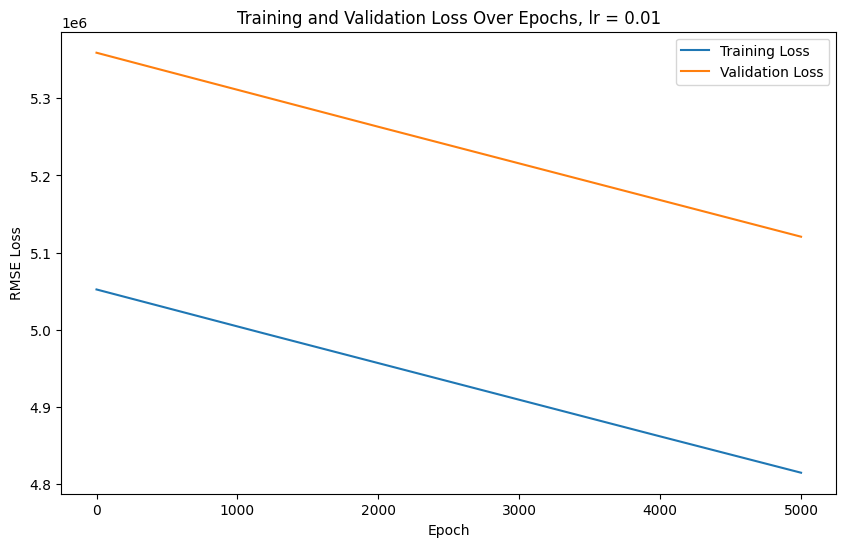


Learning rate = 0.001

Epoch 500, 	Train Loss 5049972.5, 	Val Loss 5356483.5
Epoch 1000, 	Train Loss 5047573.0, 	Val Loss 5354075.5
Epoch 1500, 	Train Loss 5045173.5, 	Val Loss 5351667.5
Epoch 2000, 	Train Loss 5042775.0, 	Val Loss 5349261.0
Epoch 2500, 	Train Loss 5040377.0, 	Val Loss 5346855.0
Epoch 3000, 	Train Loss 5037980.0, 	Val Loss 5344449.0
Epoch 3500, 	Train Loss 5035582.0, 	Val Loss 5342043.0
Epoch 4000, 	Train Loss 5033185.5, 	Val Loss 5339638.5
Epoch 4500, 	Train Loss 5030789.5, 	Val Loss 5337234.5
Epoch 5000, 	Train Loss 5028394.5, 	Val Loss 5334830.5

Params = tensor([5.9986, 5.9997, 5.9997, 5.9997, 5.9997, 5.9996, 5.9997, 5.9997,
        5.9994, 5.9984, 5.9983, 4.9997], requires_grad=True)



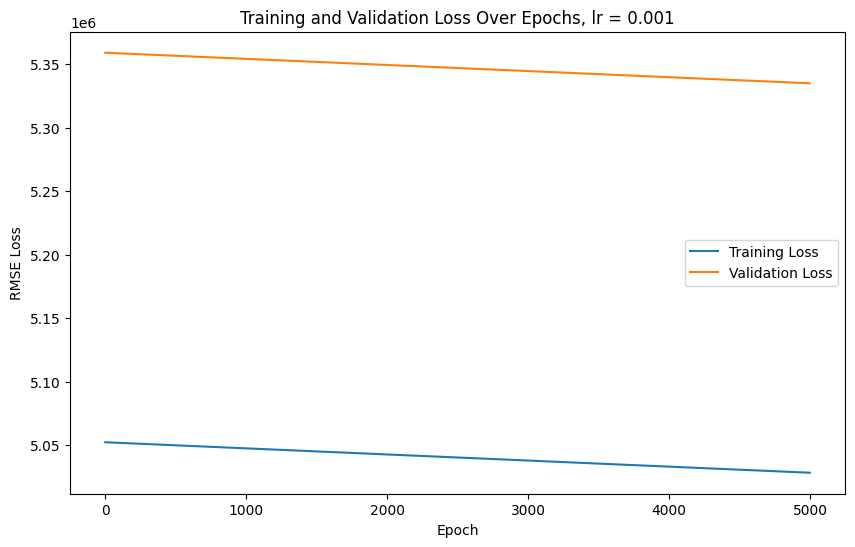


Learning rate = 0.0001

Epoch 500, 	Train Loss 5052129.0, 	Val Loss 5358646.5
Epoch 1000, 	Train Loss 5051888.5, 	Val Loss 5358405.5
Epoch 1500, 	Train Loss 5051648.5, 	Val Loss 5358164.5
Epoch 2000, 	Train Loss 5051408.5, 	Val Loss 5357923.5
Epoch 2500, 	Train Loss 5051168.5, 	Val Loss 5357682.5
Epoch 3000, 	Train Loss 5050928.0, 	Val Loss 5357442.0
Epoch 3500, 	Train Loss 5050688.0, 	Val Loss 5357201.0
Epoch 4000, 	Train Loss 5050448.0, 	Val Loss 5356960.0
Epoch 4500, 	Train Loss 5050208.0, 	Val Loss 5356719.0
Epoch 5000, 	Train Loss 5049968.0, 	Val Loss 5356478.5

Params = tensor([1.5001, 1.5001, 1.5001, 1.5001, 1.5001, 1.5001, 1.5001, 1.5001,
        1.5001, 1.5001, 1.5001, 0.5000], requires_grad=True)



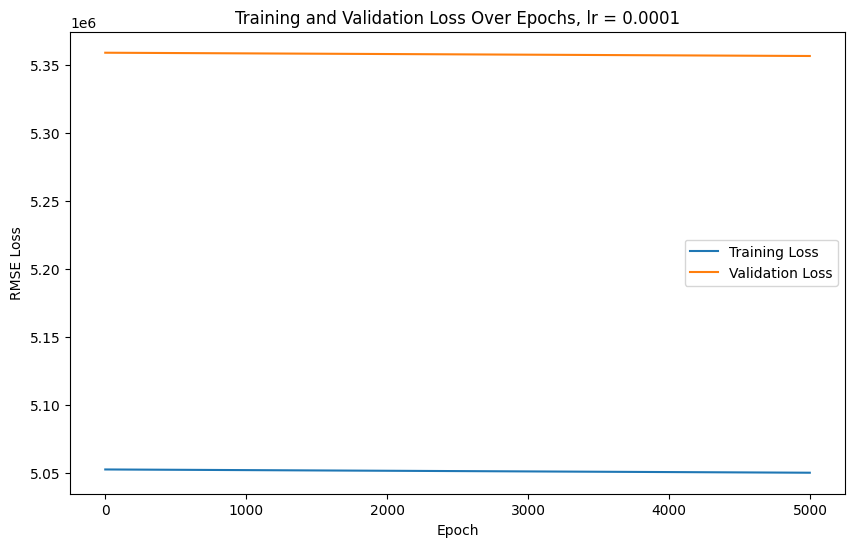

In [114]:
for learning_rate in [1, 0.1, 0.01, 0.001, 0.0001]:
    print(f'\nLearning rate = {learning_rate}\n')
    params = torch.tensor([1.0] * len(input_vars) + [0.0], requires_grad=True)
    optimizer = optim.Adam([params], lr=learning_rate)

    trained_model, train_losses, val_losses = training_loop_val(
        n_epochs = 5000,
        optimizer = optimizer,
        params = params,
        X_train = X_train,
        y_train = y_train,
        X_val = X_val,
        y_val = y_val)
    print(f'\nParams = {trained_model}\n')

    plt.figure(figsize=(10, 6))
    plt.plot(train_losses, label='Training Loss')
    plt.plot(val_losses, label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('RMSE Loss')
    plt.title(f'Training and Validation Loss Over Epochs, lr = {learning_rate}')
    plt.legend()
    plt.show()